<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/13_Logistic_Regression_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import a few libraries you think you'll need (Or just import them as you go along!)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
sns.set()

Read in the advertising.csv file and set it to a data frame called ad_data.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


** Create a histogram of the Age**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


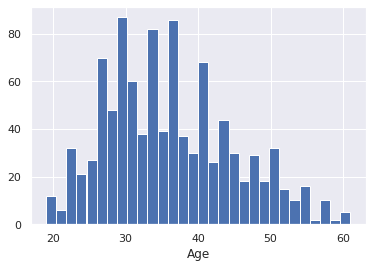

In [ ]:
sns.distplot(df['Age'], kde=False, bins=30, hist_kws={'alpha': 1})
plt.show()


Create a jointplot showing Area Income versus Age.

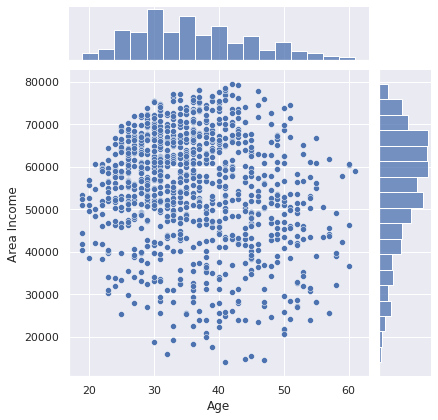

In [ ]:
sns.jointplot( x='Age', y='Area Income', data=df, kind='scatter')
plt.show()


Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.

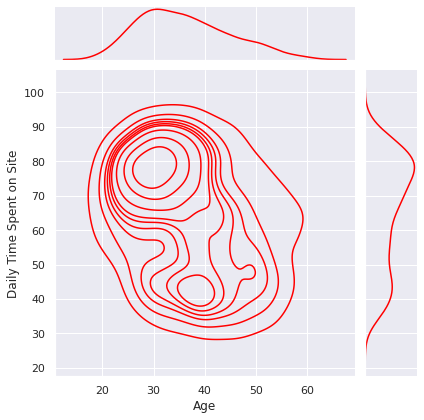

In [ ]:
sns.jointplot( x='Age', y='Daily Time Spent on Site', data=df, kind='kde',color="red")
plt.show()


** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

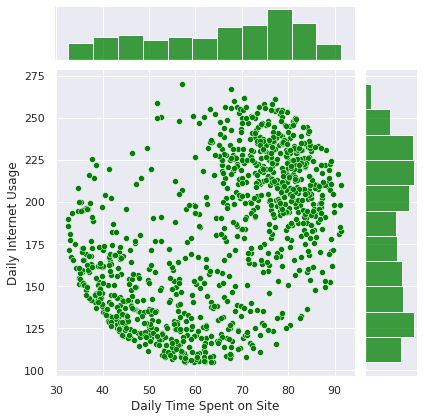

In [ ]:
sns.jointplot( x='Daily Time Spent on Site', y='Daily Internet Usage', data=df, kind='scatter', color="green")
plt.show()

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

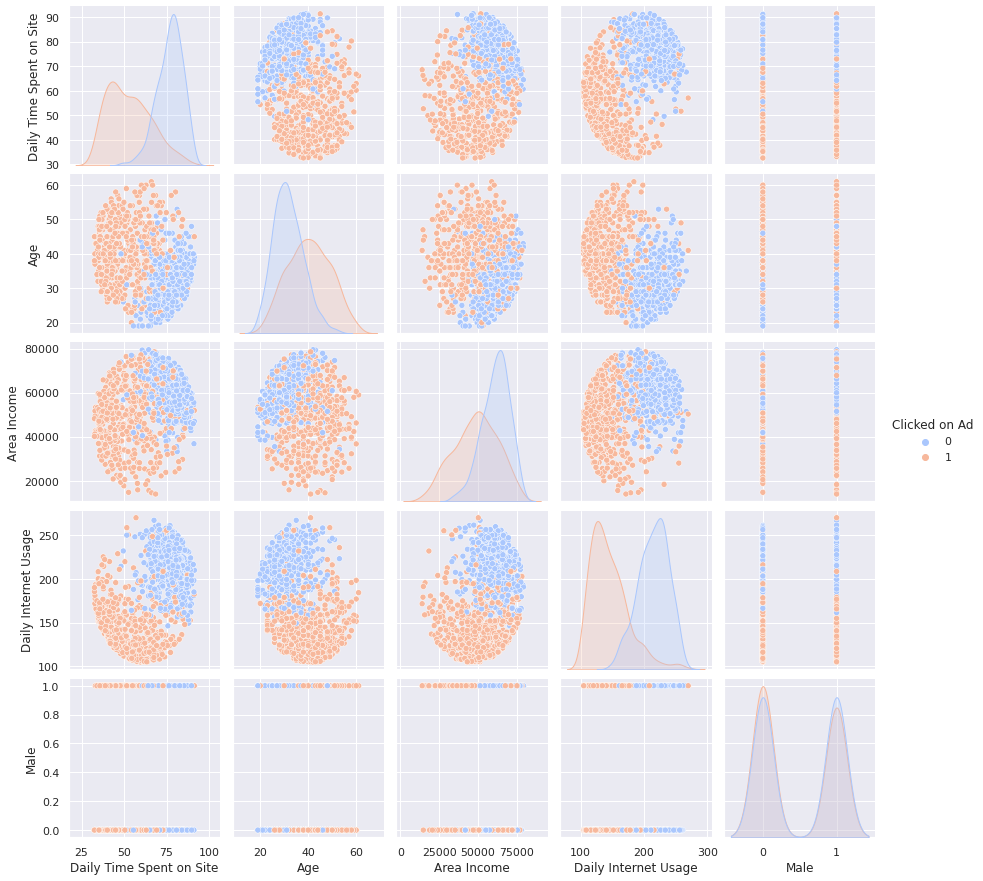

In [ ]:
sns.pairplot(df, hue='Clicked on Ad', palette='coolwarm')
plt.show()

In [ ]:
df.groupby('Clicked on Ad').count()['Age']

Clicked on Ad
0    500
1    500
Name: Age, dtype: int64

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].apply(lambda tm: tm.hour)

** Split the data into training set and testing set using train_test_split**

In [ ]:
x = df.drop(['Clicked on Ad','Ad Topic Line','City','Country','Timestamp'],axis=1)
y = df['Clicked on Ad']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)


** Train and fit a logistic regression model on the training set.**

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

** Now predict values for the testing data.**

In [ ]:
predictions = logmodel.predict(X_test)


** Create a classification report for the model.**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       157
           1       0.95      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions))

[[150   7]
 [ 15 128]]
